# **Predicting Outcomes of Baseball Games Using Machine Learning Approaches: The Sequel**

## **By: Mike Delevan**
## **October 10, 2019**

### **Initial Loading of the Data**

As you may remember, I initially used Java to load and pre-process the data for later use in the system. This horrendous mistake was made because I thought I would later use Java for web scraping. However, after some consideration I decided to do my entire project in Python instead of Java, Python, and C#. Let's look into the data on [Retrosheet](https://www.retrosheet.org/) and then go over the Java code just to get a feel for my project's humble beginnings 1.5 months ago.

As you could see from the Java file, I had to keep track of a peculiar case for the Miami Marlins. Let's combine the files for each team and see where the issue is. 


In [5]:
import pandas as pd
import os

os.chdir('C:\\Users\\Mike Delevan\\Documents\\gl2010_18')

teamAbbr = ["CHN","PHI","PIT", "CIN", "SLN", "BOS", "CHA",
                "CLE", "DET", "NYA", "BAL", "LAN", "SFN", "MIN",
                "HOU", "NYN", "ATL", "OAK", "KCA", "SDN", "TEX",
                "TOR", "SEA", "FLO", "COL", "ANA", "TBA", "ARI",
                "MIL", "WAS"]

for x in range(30):
        all_filenames = []
        for y in range(2010,2019):
            all_filenames.append(teamAbbr[x] + str(y) + ".csv")
            #print(all_filenames)

        if(os.path.isfile(teamAbbr[x]+ '_All.csv')):
            print("File has already been created!")
        else:
            combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
            combined_csv.to_csv(teamAbbr[x]+ "_All.csv", index=False, encoding='utf-8-sig')

        try:
            data = pd.read_csv(teamAbbr[x] + '_All.csv')
            data.drop(['Visiting Team Line Numbers', 'Home Team Line Numbers'],axis=1, inplace=True)
            data.to_csv(teamAbbr[x] + '_All.csv', index=False)

        except KeyError:
            print("These columns are not in the file!")


In [44]:
marlins = pd.read_csv('FLO_All.csv')
marlins.head(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
0,20100405,FLO,NL,1,NYN,NL,1,1,7,51,...,1,0,0,0,santj003,johnj009,NaN,johnj009,santj003,NaN
1,20100407,FLO,NL,2,NYN,NL,2,7,6,60,...,0,0,0,0,nunel001,takah001,woodt003,nolar001,mainj001,NaN
2,20100408,FLO,NL,3,NYN,NL,3,3,1,54,...,0,0,1,0,roben001,niesj001,nunel001,roben001,niesj001,NaN
3,20100409,LAN,NL,4,FLO,NL,4,7,3,54,...,2,0,0,0,kuroh001,volsc001,NaN,kuroh001,volsc001,NaN
4,20100410,LAN,NL,5,FLO,NL,5,6,7,52,...,2,0,1,0,veraj001,sherg001,NaN,padiv001,johnj009,NaN
5,20100411,LAN,NL,6,FLO,NL,6,5,6,51,...,2,0,0,0,hensc002,weavj002,nunel001,haegc001,sanca004,NaN
6,20100412,CIN,NL,7,FLO,NL,7,6,5,60,...,1,0,1,0,massn001,badeb001,cordf002,cuetj001,nolar001,NaN
7,20100413,CIN,NL,8,FLO,NL,8,10,8,66,...,1,0,2,0,owinm001,meyed002,cordf002,arrob001,roben001,NaN
8,20100414,CIN,NL,9,FLO,NL,9,3,5,51,...,0,0,0,0,volsc001,bailh001,badeb001,bailh001,volsc001,NaN
9,20100415,CIN,NL,10,FLO,NL,10,2,10,51,...,1,0,0,0,johnj009,haraa001,NaN,haraa001,johnj009,NaN


Seems all fine and dandy here doesn't it? Let's take a look at the most recent rows in the dataset:

In [45]:
marlins.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
1446,20180920,CIN,NL,154,FLO,NL,152,4,2,54,...,1,0,2,0,reedc002,brigj002,igler001,reedc002,brigj002,NaN
1447,20180921,CIN,NL,155,FLO,NL,153,0,1,58,...,0,0,0,0,barrk002,hernd002,NaN,castl003,chenw001,NaN
1448,20180922,CIN,NL,156,FLO,NL,154,1,5,51,...,0,0,1,0,urenj001,desca001,stecd001,desca001,urenj001,NaN
1449,20180923,CIN,NL,157,FLO,NL,155,0,6,51,...,0,0,1,0,richt001,lorem002,NaN,lorem002,richt001,NaN
1450,20180924,FLO,NL,156,WAS,NL,157,3,7,51,...,2,0,0,0,millj006,alcas001,NaN,alcas001,stras001,NaN
1451,20180925,FLO,NL,157,WAS,NL,158,4,9,51,...,2,0,0,0,schem001,brigj002,NaN,brigj002,schem001,NaN
1452,20180926,FLO,NL,158,WAS,NL,159,3,9,42,...,0,0,0,0,suerw002,chenw001,NaN,chenw001,mcgok002,NaN
1453,20180928,FLO,NL,159,NYN,NL,160,8,1,54,...,3,0,1,0,urenj001,sewap001,NaN,urenj001,oswac001,NaN
1454,20180929,FLO,NL,160,NYN,NL,161,0,1,76,...,0,0,1,0,zamod001,garcj006,NaN,richt001,matzs001,NaN
1455,20180930,FLO,NL,161,NYN,NL,162,0,1,51,...,0,0,1,0,syndn001,alcas001,NaN,alcas001,syndn001,NaN


So, it seems as though during the course of 8 years the marlins decided to change their name and their abbreviation from **FLO** to **MIA** just to inconvenience this project in 2019. Let's fix those rows so that they are all consistent with each other

In [46]:
marlins.loc[(marlins['Home Team'] == "MIA"), 'Home Team'] = "FLO"
marlins.loc[(marlins['Visting Team'] == "MIA"), 'Visting Team'] = "FLO"

Now lets check the oldest rows in the data:

In [47]:
marlins.head(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
0,20100405,FLO,NL,1,NYN,NL,1,1,7,51,...,1,0,0,0,santj003,johnj009,NaN,johnj009,santj003,NaN
1,20100407,FLO,NL,2,NYN,NL,2,7,6,60,...,0,0,0,0,nunel001,takah001,woodt003,nolar001,mainj001,NaN
2,20100408,FLO,NL,3,NYN,NL,3,3,1,54,...,0,0,1,0,roben001,niesj001,nunel001,roben001,niesj001,NaN
3,20100409,LAN,NL,4,FLO,NL,4,7,3,54,...,2,0,0,0,kuroh001,volsc001,NaN,kuroh001,volsc001,NaN
4,20100410,LAN,NL,5,FLO,NL,5,6,7,52,...,2,0,1,0,veraj001,sherg001,NaN,padiv001,johnj009,NaN
5,20100411,LAN,NL,6,FLO,NL,6,5,6,51,...,2,0,0,0,hensc002,weavj002,nunel001,haegc001,sanca004,NaN
6,20100412,CIN,NL,7,FLO,NL,7,6,5,60,...,1,0,1,0,massn001,badeb001,cordf002,cuetj001,nolar001,NaN
7,20100413,CIN,NL,8,FLO,NL,8,10,8,66,...,1,0,2,0,owinm001,meyed002,cordf002,arrob001,roben001,NaN
8,20100414,CIN,NL,9,FLO,NL,9,3,5,51,...,0,0,0,0,volsc001,bailh001,badeb001,bailh001,volsc001,NaN
9,20100415,CIN,NL,10,FLO,NL,10,2,10,51,...,1,0,0,0,johnj009,haraa001,NaN,haraa001,johnj009,NaN


Now let's check the most recent rows in the data:

In [48]:
marlins.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
1446,20180920,CIN,NL,154,FLO,NL,152,4,2,54,...,1,0,2,0,reedc002,brigj002,igler001,reedc002,brigj002,NaN
1447,20180921,CIN,NL,155,FLO,NL,153,0,1,58,...,0,0,0,0,barrk002,hernd002,NaN,castl003,chenw001,NaN
1448,20180922,CIN,NL,156,FLO,NL,154,1,5,51,...,0,0,1,0,urenj001,desca001,stecd001,desca001,urenj001,NaN
1449,20180923,CIN,NL,157,FLO,NL,155,0,6,51,...,0,0,1,0,richt001,lorem002,NaN,lorem002,richt001,NaN
1450,20180924,FLO,NL,156,WAS,NL,157,3,7,51,...,2,0,0,0,millj006,alcas001,NaN,alcas001,stras001,NaN
1451,20180925,FLO,NL,157,WAS,NL,158,4,9,51,...,2,0,0,0,schem001,brigj002,NaN,brigj002,schem001,NaN
1452,20180926,FLO,NL,158,WAS,NL,159,3,9,42,...,0,0,0,0,suerw002,chenw001,NaN,chenw001,mcgok002,NaN
1453,20180928,FLO,NL,159,NYN,NL,160,8,1,54,...,3,0,1,0,urenj001,sewap001,NaN,urenj001,oswac001,NaN
1454,20180929,FLO,NL,160,NYN,NL,161,0,1,76,...,0,0,1,0,zamod001,garcj006,NaN,richt001,matzs001,NaN
1455,20180930,FLO,NL,161,NYN,NL,162,0,1,51,...,0,0,1,0,syndn001,alcas001,NaN,alcas001,syndn001,NaN


Thankfully, no other team decided to have an identity crisis over the past few years! Go every other team in the MLB!

Let's make the team abbreviation constant over all team files! (Note: This is all done in one loop in the actual python file but for the sake of this wonderful presentation I've broken it up!)

In [49]:
for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    
    data.loc[(data['Home Team'] == "MIA"), 'Home Team'] = "FLO"
    data.loc[(data['Visting Team'] == "MIA"), 'Visting Team'] = "FLO"
    
    data.to_csv(teamAbbr[x] + '_All.csv', index=False)

### **Calculating some meaningful statistics**

Now that each team has their own file with all of their games, we can now calculate meaningful statistics from their perspective!

First let's calcute the team's Batting Average (We will use the San Francisco Giants for this!):

The formula for BA is:
### $ \frac {Hits (H)}{At-Bats (AB)} $


In [50]:
giants = pd.read_csv('SFN_All.csv')

giants['Visiting Team Batting Average'] = giants['Visting Team Hits'] / giants['Visting Team At-Bats']
giants['Home Team Batting Average'] = giants['Home Team Hits'] / giants['Home Team At-Bats']
                                                                     

Before making this presentation, I had a different formula that removed sac hits, sac flys, HBP, walks, and intentional walks from the at-bat values because I read that those didn't count towards ** *Official* ** at-bats. After some research I found that batting average rarely ever goes above .400 but when checking my files I found a lot of values above .400 and even .500 which I found odd. After checking my calculated BA values with the true values on Baseball-Reference I found the calculations were off and decided to use the formula above.

Let's check to see if the values are now in the dataframe:

In [51]:
giants.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75,Visiting Team Batting Average,Home Team Batting Average
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,2,0,erlir001,strac001,NaN,strac001,erlir001,NaN,0.235294,0.312500
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,0,0,brebj001,melam001,martc006,bumgm001,gantj002,NaN,0.235294,0.323529
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,0,0,martc006,melam001,NaN,rodrd001,waina001,NaN,0.275000,0.228571
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,0,0,mikom001,suara002,NaN,suara002,mikom001,NaN,0.147059,0.352941
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,0,0,mitcb001,holld003,yatek001,mitcb001,holld003,NaN,0.307692,0.212121
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,2,0,melam001,wickr001,NaN,erlir001,strac001,NaN,0.260870,0.204545
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,0,0,diazm004,kellc001,yatek001,perdl002,kellc001,NaN,0.235294,0.161290
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,2,0,ryu-h001,bumgm001,jansk001,ryu-h001,bumgm001,NaN,0.257143,0.206897
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,2,0,wooda002,melam001,NaN,kersc001,rodrd001,NaN,0.409091,0.264706
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,2,0,hillr001,suara002,NaN,hillr001,suara002,NaN,0.400000,0.068966


As you can see in the last two columns, the BA for both teams in the game have been calculated! Onto the next statistic!

Let's calculate a team's on-base-percentage using the formula:

### $ \frac {Hits~(H)~+~Walks~(BB)~+~Hit-by-Pitch~(HBP)}{At-Bats~(AB)~+~Walks~(BB)~+~Hit-by-Pitch~(HBP)~+~Sac Flys~(SF)} $

In [52]:
giants['Visiting Team OBP'] = (giants['Visting Team Hits'] + giants['Visting Team Walks'] + giants['Visting Team HBP']) / (giants['Visting Team At-Bats'] + giants['Visting Team Walks'] + giants['Visting Team HBP'] + giants['Visting Team Sac Flys'])
giants['Home Team OBP'] = (giants['Home Team Hits'] + giants['Home Team Walks'] + giants['Home Team HBP']) / (giants['Home Team At-Bats'] + giants['Home Team Walks'] + giants['Home Team HBP'] + giants['Home Team Sac Flys'])

giants.tail(10)


,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,erlir001,strac001,NaN,strac001,erlir001,NaN,0.235294,0.312500,0.297297,0.342857
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,brebj001,melam001,martc006,bumgm001,gantj002,NaN,0.235294,0.323529,0.333333,0.361111
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,martc006,melam001,NaN,rodrd001,waina001,NaN,0.275000,0.228571,0.325581,0.250000
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,mikom001,suara002,NaN,suara002,mikom001,NaN,0.147059,0.352941,0.147059,0.435897
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,mitcb001,holld003,yatek001,mitcb001,holld003,NaN,0.307692,0.212121,0.341463,0.277778
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,melam001,wickr001,NaN,erlir001,strac001,NaN,0.260870,0.204545,0.346154,0.204545
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,diazm004,kellc001,yatek001,perdl002,kellc001,NaN,0.235294,0.161290,0.250000,0.257143
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,ryu-h001,bumgm001,jansk001,ryu-h001,bumgm001,NaN,0.257143,0.206897,0.277778,0.303030
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,wooda002,melam001,NaN,kersc001,rodrd001,NaN,0.409091,0.264706,0.490196,0.277778
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,hillr001,suara002,NaN,hillr001,suara002,NaN,0.400000,0.068966,0.468085,0.068966


Let's calculate a team's slugging percentage using the formula:

### $ \frac {Singles~(1B)~+~2~*~Doubles~(2B)~+~3~*~Triples~(3B)~+~4~*~Homeruns~(HR)}{At-Bats~(AB)} $

In [53]:
giants['Visiting Team Slugging'] = ((giants['Visting Team Hits'] - giants['Visting Team Doubles'] - giants['Visting Team Triples'] - giants['Visting Team Home-Runs']) + (giants['Visting Team Doubles'] * 2) + (giants['Visting Team Triples'] * 3) + (giants['Visting Team Home-Runs'] * 4)) / (giants['Visting Team At-Bats'])
giants['Home Team Slugging'] = ((giants['Home Team Hits'] - giants['Home Team Doubles'] - giants['Home Team Triples'] - giants['Home Team Home-Runs']) + (giants['Home Team Doubles'] * 2) + (giants['Home Team Triples'] * 3) + (giants['Home Team Home-Runs'] * 4)) / (giants['Home Team At-Bats'])

giants.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,NaN,strac001,erlir001,NaN,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,martc006,bumgm001,gantj002,NaN,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,NaN,rodrd001,waina001,NaN,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,NaN,suara002,mikom001,NaN,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,yatek001,mitcb001,holld003,NaN,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,NaN,erlir001,strac001,NaN,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,yatek001,perdl002,kellc001,NaN,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,jansk001,ryu-h001,bumgm001,NaN,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,NaN,kersc001,rodrd001,NaN,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,NaN,hillr001,suara002,NaN,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966


You're probably asking yourself why the formula is so long in the above cell. This is because the original form of the data did not have a "Single" column so I had to calculate it by subtracting the number of doubles, triples, and homeruns.

Another interesting thing happened during this step, I got a warning saying 'TypeError: unsupported operand type(s) for -: 'int' and 'str'' which I thought was strange. After some investigation into my files I found that some lines had information that was offset by about 3 cells. Below is a snippet of what this offset looks like. What happens is that a game will get suspended and restarted on a different day. Retrosheets documents this restart by adding in 3 new indeces into their data, thus throwing off my Java parser.

In [57]:
from IPython.display import Image
Image(filename='C://Users//Mike Delevan//Desktop//Wallpapers//Random//Error1.jpg')

You might be wondering how I solved this small little error? No, I didn't do it cleanly and programmatically I couldn't figure it out. Instead I combed through 46,000 rows and manually deleted the rows with this error in it. Out of the 46,000 rows I encountered only about 30 rows had the error, go figure.

Now that the slugging percentage and the on base percentage has been calculated, we can now calculate on base plus slugging percentage using the formula:

### ${On~Base~Percentage~(OBP)}~+~{Slugging~Percentage~(SLG)} $

In [58]:
giants['Visiting Team OPS'] = giants['Visiting Team OBP'] + giants['Visiting Team Slugging']
giants['Home Team OPS'] = giants['Home Team OBP'] + giants['Home Team Slugging']

giants.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Starter Pitcher ID,Unnamed: 75,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,erlir001,NaN,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,gantj002,NaN,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,waina001,NaN,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,mikom001,NaN,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,holld003,NaN,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,strac001,NaN,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,kellc001,NaN,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,bumgm001,NaN,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,rodrd001,NaN,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,suara002,NaN,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931


Next we will determine whether the team won their previous game or not. Here we have to check whether they were the home team or the away team and then determine the winner:

In [60]:
giants.loc[(giants['Home Team'] == 'SFN') & (giants['Home Team Score'] > giants['Visiting Team Score']), 'Win'] = 1

giants.loc[(giants['Visting Team'] == 'SFN') & (giants['Visiting Team Score'] > giants['Home Team Score']), 'Win'] = 1

giants.loc[(giants['Home Team'] == 'SFN') & (giants['Home Team Score'] < giants['Visiting Team Score']), 'Win'] = 0

giants.loc[(giants['Visting Team'] == 'SFN') & (giants['Visiting Team Score'] < giants['Home Team Score']), 'Win'] = 0

giants.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Unnamed: 75,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS,Win
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,NaN,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107,0.0
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,NaN,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876,0.0
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,NaN,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571,0.0
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,NaN,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309,0.0
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,NaN,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202,0.0
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,NaN,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182,1.0
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,NaN,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207,0.0
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,NaN,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375,0.0
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,NaN,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719,0.0
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,NaN,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931,0.0


Finally (for now) we will determine if the given team has won their last game. This will require us to look back a row and determine if they won the game in that row:

In [61]:
giants.loc[(giants['Home Team'].shift() == 'SFN') & (giants['Home Team Score'].shift() > giants['Visiting Team Score'].shift()), 'wonPrev'] = 1
giants.loc[(giants['Home Team'].shift() == 'SFN') & (giants['Home Team Score'].shift() < giants['Visiting Team Score'].shift()), 'wonPrev'] = 0

giants.loc[(giants['Visting Team'].shift() == 'SFN') & (giants['Visiting Team Score'].shift() > giants['Home Team Score'].shift()), 'wonPrev'] = 1
giants.loc[(giants['Visting Team'].shift() == 'SFN') & (giants['Visiting Team Score'].shift() < giants['Home Team Score'].shift()), 'wonPrev'] = 0

giants.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS,Win,wonPrev
1446,20180919,SFN,NL,153,SDN,NL,153,4,8,51,...,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107,0.0,1.0
1447,20180921,SFN,NL,154,SLN,NL,154,3,5,51,...,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876,0.0,0.0
1448,20180922,SFN,NL,155,SLN,NL,155,4,5,59,...,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571,0.0,0.0
1449,20180923,SFN,NL,156,SLN,NL,156,2,9,51,...,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309,0.0,0.0
1450,20180924,SDN,NL,157,SFN,NL,157,5,0,54,...,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202,0.0,0.0
1451,20180925,SDN,NL,158,SFN,NL,158,4,5,69,...,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182,1.0,0.0
1452,20180926,SDN,NL,159,SFN,NL,159,3,2,54,...,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207,0.0,1.0
1453,20180928,LAN,NL,160,SFN,NL,160,3,1,54,...,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375,0.0,0.0
1454,20180929,LAN,NL,161,SFN,NL,161,10,6,54,...,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719,0.0,0.0
1455,20180930,LAN,NL,162,SFN,NL,162,15,0,54,...,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931,0.0,0.0


Let's apply this to all files in the dataset:

In [62]:
for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    
    data['Visiting Team Batting Average'] = data['Visting Team Hits'] / (data['Visting Team At-Bats'])
    data['Home Team Batting Average'] = data['Home Team Hits'] / (data['Home Team At-Bats'])
    data['Visiting Team OBP'] = (data['Visting Team Hits'] + data['Visting Team Walks'] + data['Visting Team HBP']) / (data['Visting Team At-Bats'] + data['Visting Team Walks'] + data['Visting Team HBP'] + data['Visting Team Sac Flys'])
    data['Home Team OBP'] = (data['Home Team Hits'] + data['Home Team Walks'] + data['Home Team HBP']) / (data['Home Team At-Bats'] + data['Home Team Walks'] + data['Home Team HBP'] + data['Home Team Sac Flys'])
    data['Visiting Team Slugging'] = ((data['Visting Team Hits'] - data['Visting Team Doubles'] - data['Visting Team Triples'] - data['Visting Team Home-Runs']) + (data['Visting Team Doubles'] * 2) + (data['Visting Team Triples'] * 3) + (data['Visting Team Home-Runs'] * 4)) / (data['Visting Team At-Bats'])
    data['Home Team Slugging'] = ((data['Home Team Hits'] - data['Home Team Doubles'] - data['Home Team Triples'] - data['Home Team Home-Runs']) + (data['Home Team Doubles'] * 2) + (data['Home Team Triples'] * 3) + (data['Home Team Home-Runs'] * 4)) / (data['Home Team At-Bats'])

    data['Visiting Team OPS'] = data['Visiting Team OBP'] + data['Visiting Team Slugging']
    data['Home Team OPS'] = data['Home Team OBP'] + data['Home Team Slugging']


    #Determining if teamAbb[x] won the game
    data.loc[(data['Home Team'] == teamAbbr[x]) & (data['Home Team Score'] > data['Visiting Team Score']), 'Win'] = 1

    data.loc[(data['Visting Team'] == teamAbbr[x]) & (data['Visiting Team Score'] > data['Home Team Score']), 'Win'] = 1

    data.loc[(data['Home Team'] == teamAbbr[x]) & (data['Home Team Score'] < data['Visiting Team Score']), 'Win'] = 0

    data.loc[(data['Visting Team'] == teamAbbr[x]) & (data['Visiting Team Score'] < data['Home Team Score']), 'Win'] = 0

    # Determining if teamAbbr[x] won their previous game
    data.loc[(data['Home Team'].shift() == teamAbbr[x]) & (data['Home Team Score'].shift() > data['Visiting Team Score'].shift()), 'wonPrev'] = 1
    data.loc[(data['Home Team'].shift() == teamAbbr[x]) & (data['Home Team Score'].shift() < data['Visiting Team Score'].shift()), 'wonPrev'] = 0

    data.loc[(data['Visting Team'].shift() == teamAbbr[x]) & (data['Visiting Team Score'].shift() > data['Home Team Score'].shift()), 'wonPrev'] = 1
    data.loc[(data['Visting Team'].shift() == teamAbbr[x]) & (data['Visiting Team Score'].shift() < data['Home Team Score'].shift()), 'wonPrev'] = 0
    
    data.to_csv(teamAbbr[x] + '_All.csv', index=False)

After all the data has been processed and meaningful statistics have been calculated, I intended to process the data further so that each row just contained statistics for the team listed in the file name. All I would have to do is to iterate through the rows in the original dataframe and extract the information I need whether the team is the home team or the visiting team.

In [64]:
def fillTeamDF(data, final, teamAbbr):

    for (idx, row) in data.iterrows():
        if(row.loc['Home Team'] == teamAbbr):
            final.loc[idx+1] = [teamAbbr, row['League.1'], row['Home Team Score'], 1, row['Home Team At-Bats'], row['Home Team Hits'], row['Home Team Doubles'],
                               row['Home Team Triples'], row['Home Team Home-Runs'], row['Home Team RBI'], row['Home Team Walks'], row['Home Team Strikeouts'],
                               row['Home Team LOB'], row['Home Team Pitchers Used'], row['Home Team Ind ER'], row['Home Team Team ER'], row['Home Team Errors'],
                               row['Home Team Batting Average'], row['Home Team OBP'], row['Home Team Slugging'], row['Home Team OPS'], row['Win'], row['wonPrev'] ]

        else:
            final.loc[idx+1] = [teamAbbr, row['League'], row['Visiting Team Score'], 0, row['Visting Team At-Bats'],
                              row['Visting Team Hits'], row['Visting Team Doubles'],
                              row['Visting Team Triples'], row['Visting Team Home-Runs'], row['Visting Team RBI'],
                              row['Visting Team Walks'], row['Visting Team Strikeouts'],
                              row['Visiting Team LOB'], row['Visting Team Pitchers Used'], row['Visting Team Ind ER'],
                              row['Visting Team Team ER'], row['Visting Team Errors'],
                              row['Visiting Team Batting Average'], row['Visiting Team OBP'], row['Visiting Team Slugging'],
                              row['Visiting Team OPS'], row['Win'], row['wonPrev']]

    final.to_csv(teamAbbr + '_Full.csv', index=False)

for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    final = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'wonPrev'])
    fillTeamDF(data, final, teamAbbr[x])

final.tail(10)

Printing final DF
     teamAbbr League  Score  isHomeTeam  atBats  Hits  Doubles  Triples  \
1446      CHN     NL      8           0      37     9        2        0   
1447      CHN     NL      6           0      42    15        4        0   
1449      CHN     NL      1           1      33     7        0        0   
1450      CHN     NL      0           1      31     5        1        0   
1451      CHN     NL      7           1      37    12        0        0   
1452      CHN     NL      3           1      32    10        4        1   
1453      CHN     NL      8           1      31     8        1        0   
1454      CHN     NL      1           1      31     5        0        0   
1455      CHN     NL     10           1      35    12        5        1   
1456      CHN     NL      1           1      28     3        0        0   

      homeRuns  RBI  ...  LOB  pitchersUsed  indER  teamER  Errors  \
1446         1    7  ...    6             5      2       2       1   
1447         1  

,teamAbbr,League,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,...,LOB,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win
1444,WAS,NL,4,0,32,9,1,0,0,4,...,14,5,2,2,0,0.281250,0.454545,0.312500,0.767045,1.0
1446,WAS,NL,4,1,44,9,2,0,1,4,...,9,8,5,5,0,0.204545,0.285714,0.318182,0.603896,0.0
1447,WAS,NL,2,1,30,6,1,0,0,2,...,4,4,3,3,1,0.200000,0.242424,0.233333,0.475758,0.0
1448,WAS,NL,6,1,30,7,4,0,2,6,...,5,5,0,0,0,0.233333,0.342857,0.566667,0.909524,1.0
1449,WAS,NL,6,1,38,11,2,1,1,6,...,13,7,8,8,0,0.289474,0.413043,0.473684,0.886728,0.0
1450,WAS,NL,7,1,31,9,3,0,3,7,...,8,5,2,2,2,0.290323,0.394737,0.677419,1.072156,1.0
1451,WAS,NL,9,1,32,11,4,0,1,9,...,9,4,3,3,2,0.343750,0.500000,0.562500,1.062500,1.0
1452,WAS,NL,2,0,38,12,2,1,0,2,...,10,5,5,5,0,0.315789,0.333333,0.421053,0.754386,0.0
1453,WAS,NL,12,0,43,18,2,1,2,12,...,9,5,2,2,1,0.418605,0.468085,0.651163,1.119248,1.0
1454,WAS,NL,0,0,28,5,2,0,0,0,...,5,5,12,12,0,0.178571,0.281250,0.250000,0.531250,0.0


Looks like this operation was a success! More stats will be added in the near future but for right now that's all I'll do with the data for this presentation.

To make data that will be used to predict the matches coming up I will calculate the 10 game averages for each team and put it in a file for the machine learning algorithms to use:


Let's load in one team's data just to mess around with:

In [65]:
data = pd.read_csv('SLN_Full.csv')
data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
data.tail(10)

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,LOB,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win
1342,8,0,37,11,2,0,1,7,3,14,6,5,1,1,1,0.297297,0.365854,0.432432,0.798286,1.0
1343,3,0,32,8,1,0,1,3,5,10,9,5,6,6,1,0.250000,0.358974,0.375000,0.733974,0.0
1344,5,1,34,11,3,0,0,5,2,8,8,6,3,3,0,0.323529,0.361111,0.411765,0.772876,1.0
1345,5,1,35,8,1,0,2,5,1,5,2,3,4,4,4,0.228571,0.250000,0.428571,0.678571,1.0
1346,9,1,34,12,3,0,1,9,4,9,8,3,1,1,2,0.352941,0.435897,0.529412,0.965309,1.0
1347,4,1,35,8,2,0,2,4,2,11,7,7,6,6,1,0.228571,0.289474,0.457143,0.746617,0.0
1348,4,1,33,8,1,0,1,4,4,7,7,8,12,12,3,0.242424,0.315789,0.363636,0.679426,0.0
1349,4,0,35,9,3,0,0,3,2,3,8,7,7,7,3,0.257143,0.315789,0.342857,0.658647,0.0
1350,2,0,29,3,0,0,0,2,2,11,5,2,0,0,1,0.103448,0.212121,0.103448,0.315569,1.0
1351,5,0,36,11,4,0,0,4,5,10,12,7,8,8,1,0.305556,0.418605,0.416667,0.835271,0.0


Both league and team abbreviation are dropped because the describe function, which gets averages, cannot take an average of a categorical variable. These will get added back in

In [66]:
data['Team Abbr'] = "Team Abbr"
data.iloc[:0]

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,Team Abbr


Now that the header for the file is setup, lets get the descriptive statistics

In [70]:
data.tail(10).describe()

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,LOB,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.90000,0.500000,34.000000,8.900000,2.000000,0.0,0.800000,4.600000,3.000000,8.800000,7.200000,5.300000,4.800000,4.800000,1.700000,0.258948,0.332362,0.386093,0.718455,0.500000
std,2.13177,0.527046,2.260777,2.601282,1.247219,0.0,0.788811,2.065591,1.414214,3.190263,2.616189,2.057507,3.735714,3.735714,1.251666,0.069146,0.070272,0.112308,0.167981,0.527046
min,2.00000,0.000000,29.000000,3.000000,0.000000,0.0,0.000000,2.000000,1.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.103448,0.212121,0.103448,0.315569,0.000000
25%,4.00000,0.000000,33.250000,8.000000,1.000000,0.0,0.000000,3.250000,2.000000,7.250000,6.250000,3.500000,1.500000,1.500000,1.000000,0.232035,0.296053,0.366477,0.678785,0.000000
50%,4.50000,0.500000,34.500000,8.500000,2.000000,0.0,1.000000,4.000000,2.500000,9.500000,7.500000,5.500000,5.000000,5.000000,1.000000,0.253571,0.337382,0.414216,0.740295,0.500000
75%,5.00000,1.000000,35.000000,11.000000,3.000000,0.0,1.000000,5.000000,4.000000,10.750000,8.000000,7.000000,6.750000,6.750000,2.750000,0.303491,0.364668,0.431467,0.791934,1.000000
max,9.00000,1.000000,37.000000,12.000000,4.000000,0.0,2.000000,9.000000,5.000000,14.000000,12.000000,8.000000,12.000000,12.000000,4.000000,0.352941,0.435897,0.529412,0.965309,1.000000


I will now have to extract the values from the mean row and then append them to the averages file later.

In [72]:
description = data.tail(10).describe()
description.iloc[1:2]

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,LOB,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win
mean,4.9,0.5,34.0,8.9,2.0,0.0,0.8,4.6,3.0,8.8,7.2,5.3,4.8,4.8,1.7,0.258948,0.332362,0.386093,0.718455,0.5


Let's do this for all files and actually save it in a file

In [73]:
def write_averages(data, teamAbbr):
    if (os.path.isfile('team_averages.csv')):
        print("File has already been created!")
    else:
        avg_file = open("team_averages.csv", "w+")
        data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
        data.tail(10)
        data['Team Abbr'] = "Team Abbr"
        data.iloc[:0].to_csv('team_averages.csv', index=False, header=True)

    try:
        data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
    except KeyError:
        print("Columns have already been deleted!")

    description = data.tail(10).describe()
    description['TeamAbbr'] = teamAbbr
    description.iloc[1:2].to_csv('team_averages.csv', index=False, header=False,mode='a')

for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_Full.csv')
    
    write_averages(data, teamAbbr[x])

Columns have already been deleted!
           Score  isHomeTeam     atBats       Hits    Doubles    Triples  \
count  10.000000   10.000000  10.000000  10.000000  10.000000  10.000000   
mean    4.500000    0.800000  33.700000   8.600000   1.700000   0.200000   
std     3.689324    0.421637   4.083844   3.747592   1.946507   0.421637   
min     0.000000    0.000000  28.000000   3.000000   0.000000   0.000000   
25%     1.000000    1.000000  31.000000   5.500000   0.000000   0.000000   
50%     4.500000    1.000000  32.500000   8.500000   1.000000   0.000000   
75%     7.750000    1.000000  36.500000  11.500000   3.500000   0.000000   
max    10.000000    1.000000  42.000000  15.000000   5.000000   1.000000   

        homeRuns        RBI      Walks  Strikeouts        LOB  pitchersUsed  \
count  10.000000  10.000000  10.000000   10.000000  10.000000     10.000000   
mean    0.700000   4.100000   3.300000    7.600000   7.000000      5.300000   
std     0.483046   3.414023   1.567021    1

This is not perfect though, I will have to replace the average for isHomeTeam because that value is basically a class value (1 or 0) so that will need to get changed in later versions of this project. Also because I am using averages to actually predict games, the system may need to be trained on averages too so this whole data pre-processing section may need to get reworked down the road.

Before the next section I'd like to do a little exploratory data analysis on the relationship between OPS and win classification:

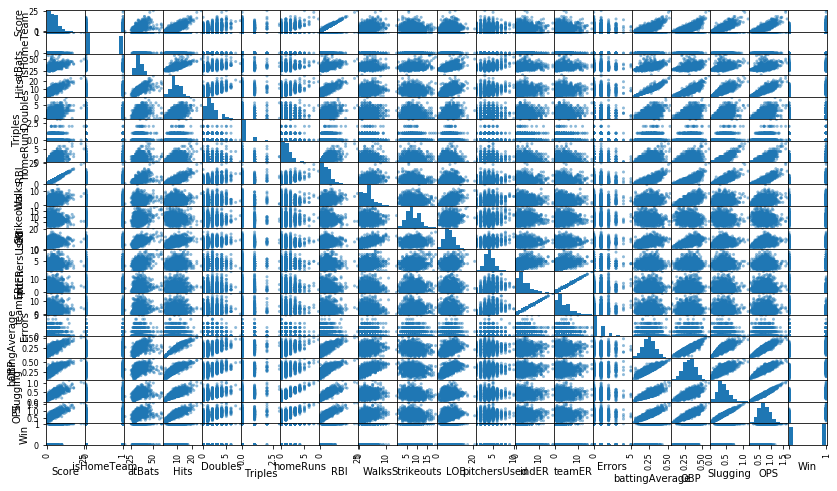

In [92]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt

scatter_matrix(data, figsize=(14,8))
plt.show()

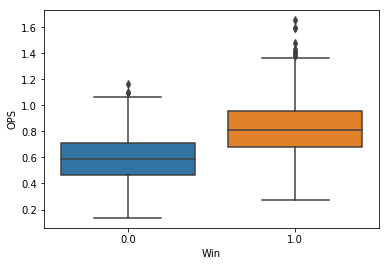

In [93]:
import seaborn as sns
sns.boxplot(x=data["Win"], y=data["OPS"] )

What can you infer by looking at this graph?

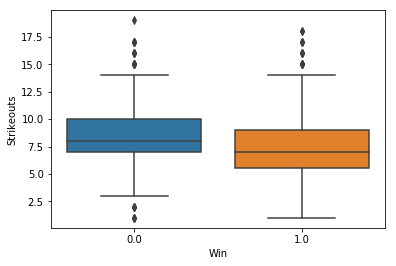

In [94]:
import seaborn as sns
sns.boxplot(x=data["Win"], y=data["Strikeouts"] )

What can you infer from this graph?

teamAbbr
ARI    AxesSubplot(0.125,0.125;0.775x0.755)
NYA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: OPSAverage, dtype: object

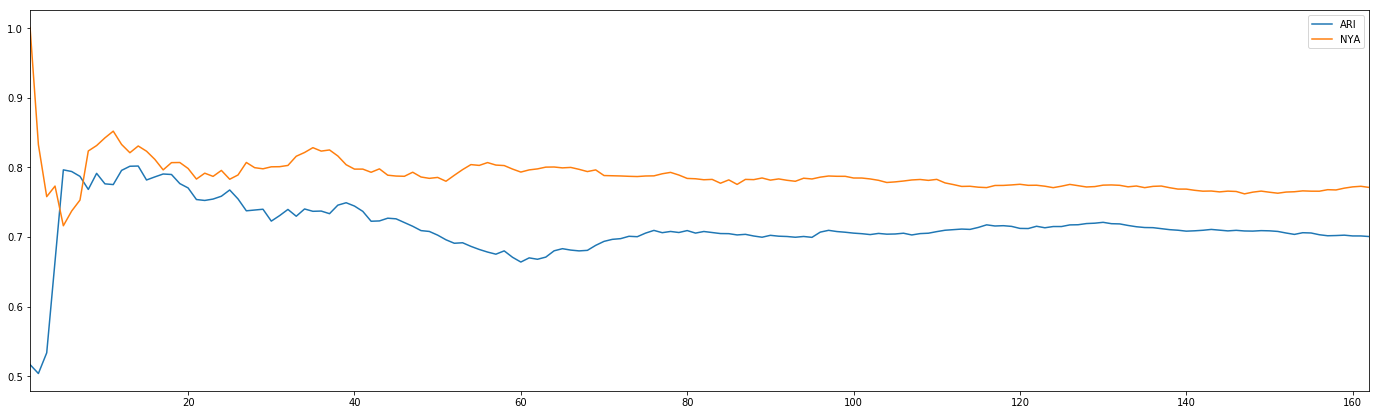

In [174]:
team1 = pd.read_csv('ARI_Full.csv')
team1Copy = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])

team1size = team1.shape[0]
y=0
for x in range(team1size - 162, team1size):
    
    team1Copy.loc[y+1] = team1.loc[x]
    y = y+1

avgArray = np.array([])
sum = 0
for (idx, row) in team1Copy.iterrows():
    sum = sum + row['OPS']
    average  = sum / (len(avgArray)+1)
    avgArray = np.append(avgArray, average)

team1Copy['OPSAverage'] = avgArray



team2 = pd.read_csv('NYA_Full.csv')
team2Copy = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])
team2size = team2.shape[0]
y=0
for x in range(team2size - 162, team2size):
    team2Copy.loc[y+1] = team2.loc[x]
    y = y+1

avgArray = np.array([])
sum = 0
for (idx, row) in team2Copy.iterrows():
    sum = sum + row['OPS']
    average  = sum / (len(avgArray)+1)
    avgArray = np.append(avgArray, average)

team2Copy['OPSAverage'] = avgArray



combined = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])

combined = combined.append(team1Copy)
combined = combined.append(team2Copy)
color = ['blue', 'gray']
combined.groupby("teamAbbr")['OPSAverage'].plot(figsize=(24,7), legend=True)

In [156]:
team2Copy

,teamAbbr,League,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,OPSAverage
1,CHN,NL,4,1,34,10,3,0,1,4,...,3,1,1,0,0.294118,0.400000,0.470588,0.870588,1.0,0.870588
2,CHN,NL,2,0,32,6,2,0,1,2,...,4,1,1,1,0.187500,0.212121,0.343750,0.555871,1.0,0.713230
3,CHN,NL,1,0,29,5,2,0,0,1,...,5,8,8,0,0.172414,0.272727,0.241379,0.514107,0.0,0.646855
4,CHN,NL,5,0,37,12,1,1,2,5,...,7,3,3,0,0.324324,0.418605,0.567568,0.986172,1.0,0.731685
5,CHN,NL,5,0,35,9,1,0,0,5,...,5,4,4,0,0.257143,0.380952,0.285714,0.666667,1.0,0.718681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,CHN,NL,3,1,32,10,4,1,0,3,...,4,0,0,1,0.312500,0.371429,0.500000,0.871429,1.0,0.726242
159,CHN,NL,8,1,31,8,1,0,1,8,...,2,2,2,3,0.258065,0.342105,0.387097,0.729202,1.0,0.726261
160,CHN,NL,1,1,31,5,0,0,0,0,...,3,1,1,1,0.161290,0.161290,0.161290,0.322581,0.0,0.723738
161,CHN,NL,10,1,35,12,5,1,1,8,...,9,4,4,1,0.342857,0.439024,0.628571,1.067596,1.0,0.725873


### **Machine Learning/Neural Networks**

Now that the data has been pre-processed to my liking (so far) we can begin the fun process of finding a machine learning algorithm that will best predict the winner of a game!

In [175]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
import pickle

Predicting the winner of a game is a classification problem, therefore Logistic Regression will need to be used to determine the Win/Loss Outcome.

Here we will create a logistic regression model and train it over all files. For each of these files we will split them into 80% training sets and 20% test sets. The training set will be used to train our model so that it can generalize well enough for data it hasn't seen before, such as the test set. The test set will be used to analyze the accuracy of our model and will let us decide whether we need to modify our data or the model.

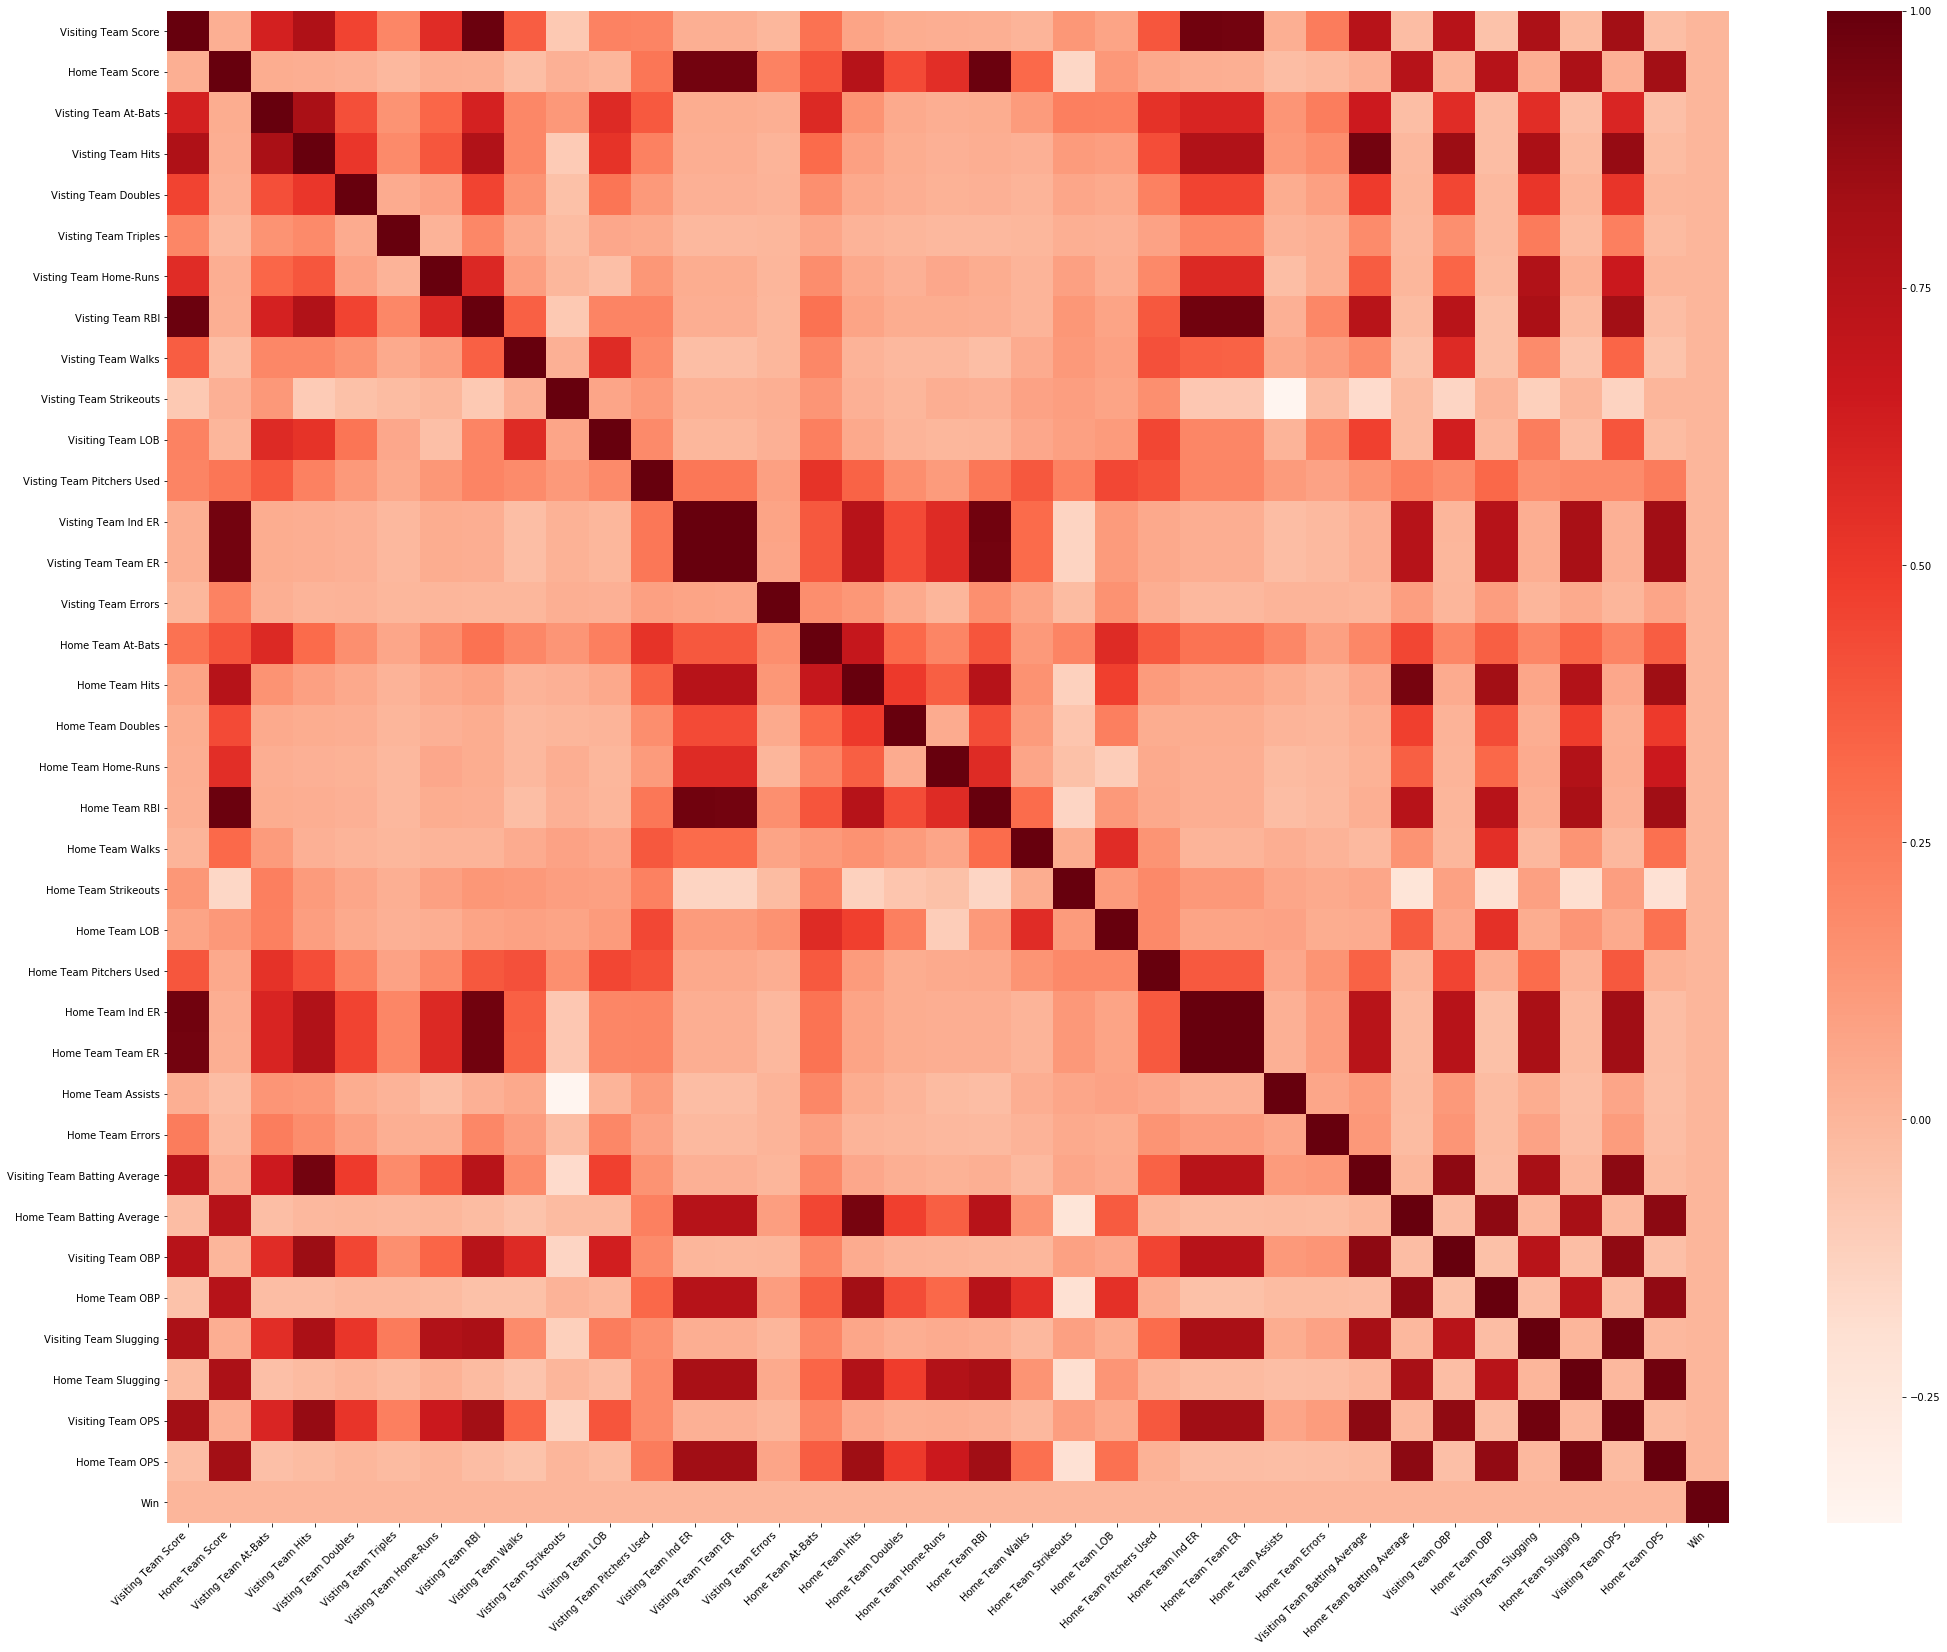

In [199]:
data = pd.read_csv('combinedDataBad.csv')

data.drop(['Visting Team','Date', 'League', 'Home Team', 'League.1', 'Park ID'], axis=1, inplace=True)
data.drop(['Winning Pitcher ID', 'Visting Team Stolen Bases', 'Saving Pitcher ID','Home Team Stolen Bases', 'Visting Team Caught Stealing',
            'Home Team Caught Stealing', 'Visting Team G Double Play', 'Home Team G Double Play',
            'Losing Pitcher ID', 'Saving Pitcher ID', 'Visiting Starter Pitcher ID', 'Home Starter Pitcher ID',
            'Visting Team Awarded First on Interference', 'Home Team Awarded First on Interference',
            'Visting Team Balks', 'Home Team Balks', 'Visting Team Put-outs', 'Home Team Put-outs',
            'Visting Team Assists', 'Visting Team Passed Balls', 'Home Team Passed Balls',
            'Visting Team Double Plays','Attendance', 'Home Team Double Plays',
            'Home Team Triple Plays', 'Visting Team Triple Plays', 'Home Team Triples',
            'Visiting Team Sac Hits', 'Home Team Int Walks', 'Visting Team Int Walks',
            'Home Team Sac Hits', 'Length of Game in Outs', 'Visting Team Sac Flys', 'Home Team Sac Flys',
            'Home Team Wild Pitches', 'Home Team HBP', 'Visting Team HBP', 'Visting Team Wild Pitches',
            'Visiting Team Game Number', 'Home Team Game Number', 'wonPrev'], axis=1, inplace=True)

try:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.drop(['Unnamed: 75'], axis=1, inplace=True)

except KeyError:
    print("Column is not in the file!!!")

data.dropna(axis=0)

plt.subplots(figsize=(35,35))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.gcf().subplots_adjust(top=.95,bottom=0.35)
plt.xticks(rotation=45,ha='right')
fig = plt.gcf()
plt.show()

This is the graph I showed in my first presentation which shows the correlation between all of the variables found in the dataframe. Because there are so many vairables in the dataframe, there ends up being no variables that correlate with a win. This is obviously not good and thus means that we need to do more data preprocessing which we have done. Let's show how well this unprocessed data will perform with a simple machine learning algorithm:

In [200]:
logmodel = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(data.drop('Win', axis=1),
                                                        data['Win'], test_size=0.20,
                                                        random_state=101)
print(data.isna().any())

Visiting Team Score              False
Home Team Score                  False
Visting Team At-Bats             False
Visting Team Hits                False
Visting Team Doubles             False
Visting Team Triples             False
Visting Team Home-Runs           False
Visting Team RBI                 False
Visting Team Walks               False
Visting Team Strikeouts          False
Visiting Team LOB                False
Visting Team Pitchers Used       False
Visting Team Ind ER              False
Visting Team Team ER             False
Visting Team Errors              False
Home Team At-Bats                False
Home Team Hits                   False
Home Team Doubles                False
Home Team Home-Runs              False
Home Team RBI                    False
Home Team Walks                  False
Home Team Strikeouts             False
Home Team LOB                    False
Home Team Pitchers Used          False
Home Team Ind ER                 False
Home Team Team ER        

Here we are modifying the data into a 80/20 train/test split along with their actual labels also split. Here, scikit-learn comes with a pre-packaged method that splits the data into a specified size which is really handy. First, we drop the Win column from the dataframe, which will become X_train and X_test, as that is the label we're predicting and supply that to train_test_split. We then feed those Win values back into train_test_split to get y_train and y_test so that we can measure the accuracy of our model. We supply our test set size to get a good split like 80/20 or 70/30. A seed is also set so that the results can be consistent across developers. Now that this is out of the way, let's train on bad data!

In [201]:
logmodel.fit(X_train, y_train)


logistic_reg_score_train = logmodel.score(X_train, y_train)
print("Percentage correct on training set = ", 100. * logistic_reg_score_train, "%")

c:\users\mike delevan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Percentage correct on training set =  50.42194696341219 %


So without any sort of preprocessing our model can get 50.4% correct on the training set which isn't good but isn't bad either, kind of like the Red Sox. LEt's see how it does on the test set, AKA data it's never seen before:

              precision    recall  f1-score   support

           0       0.48      0.44      0.46      4386
           1       0.48      0.53      0.51      4354

   micro avg       0.48      0.48      0.48      8740
   macro avg       0.48      0.48      0.48      8740
weighted avg       0.48      0.48      0.48      8740

[[1918 2468]
 [2049 2305]]


[Text(0, 0.5, 'Loss'), Text(0, 1.5, 'Win')]

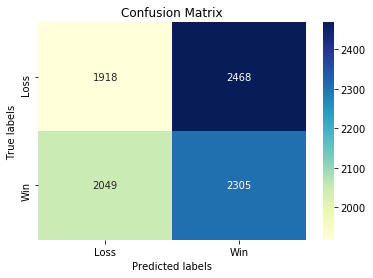

In [202]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

#plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, cmap="YlGnBu", fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Loss', 'Win'])
ax.yaxis.set_ticklabels(['Loss', 'Win'])

So our model does slightly worse on the test data getting around 48% correct on the test set. Let's see what happens when we use our preprocessed data!

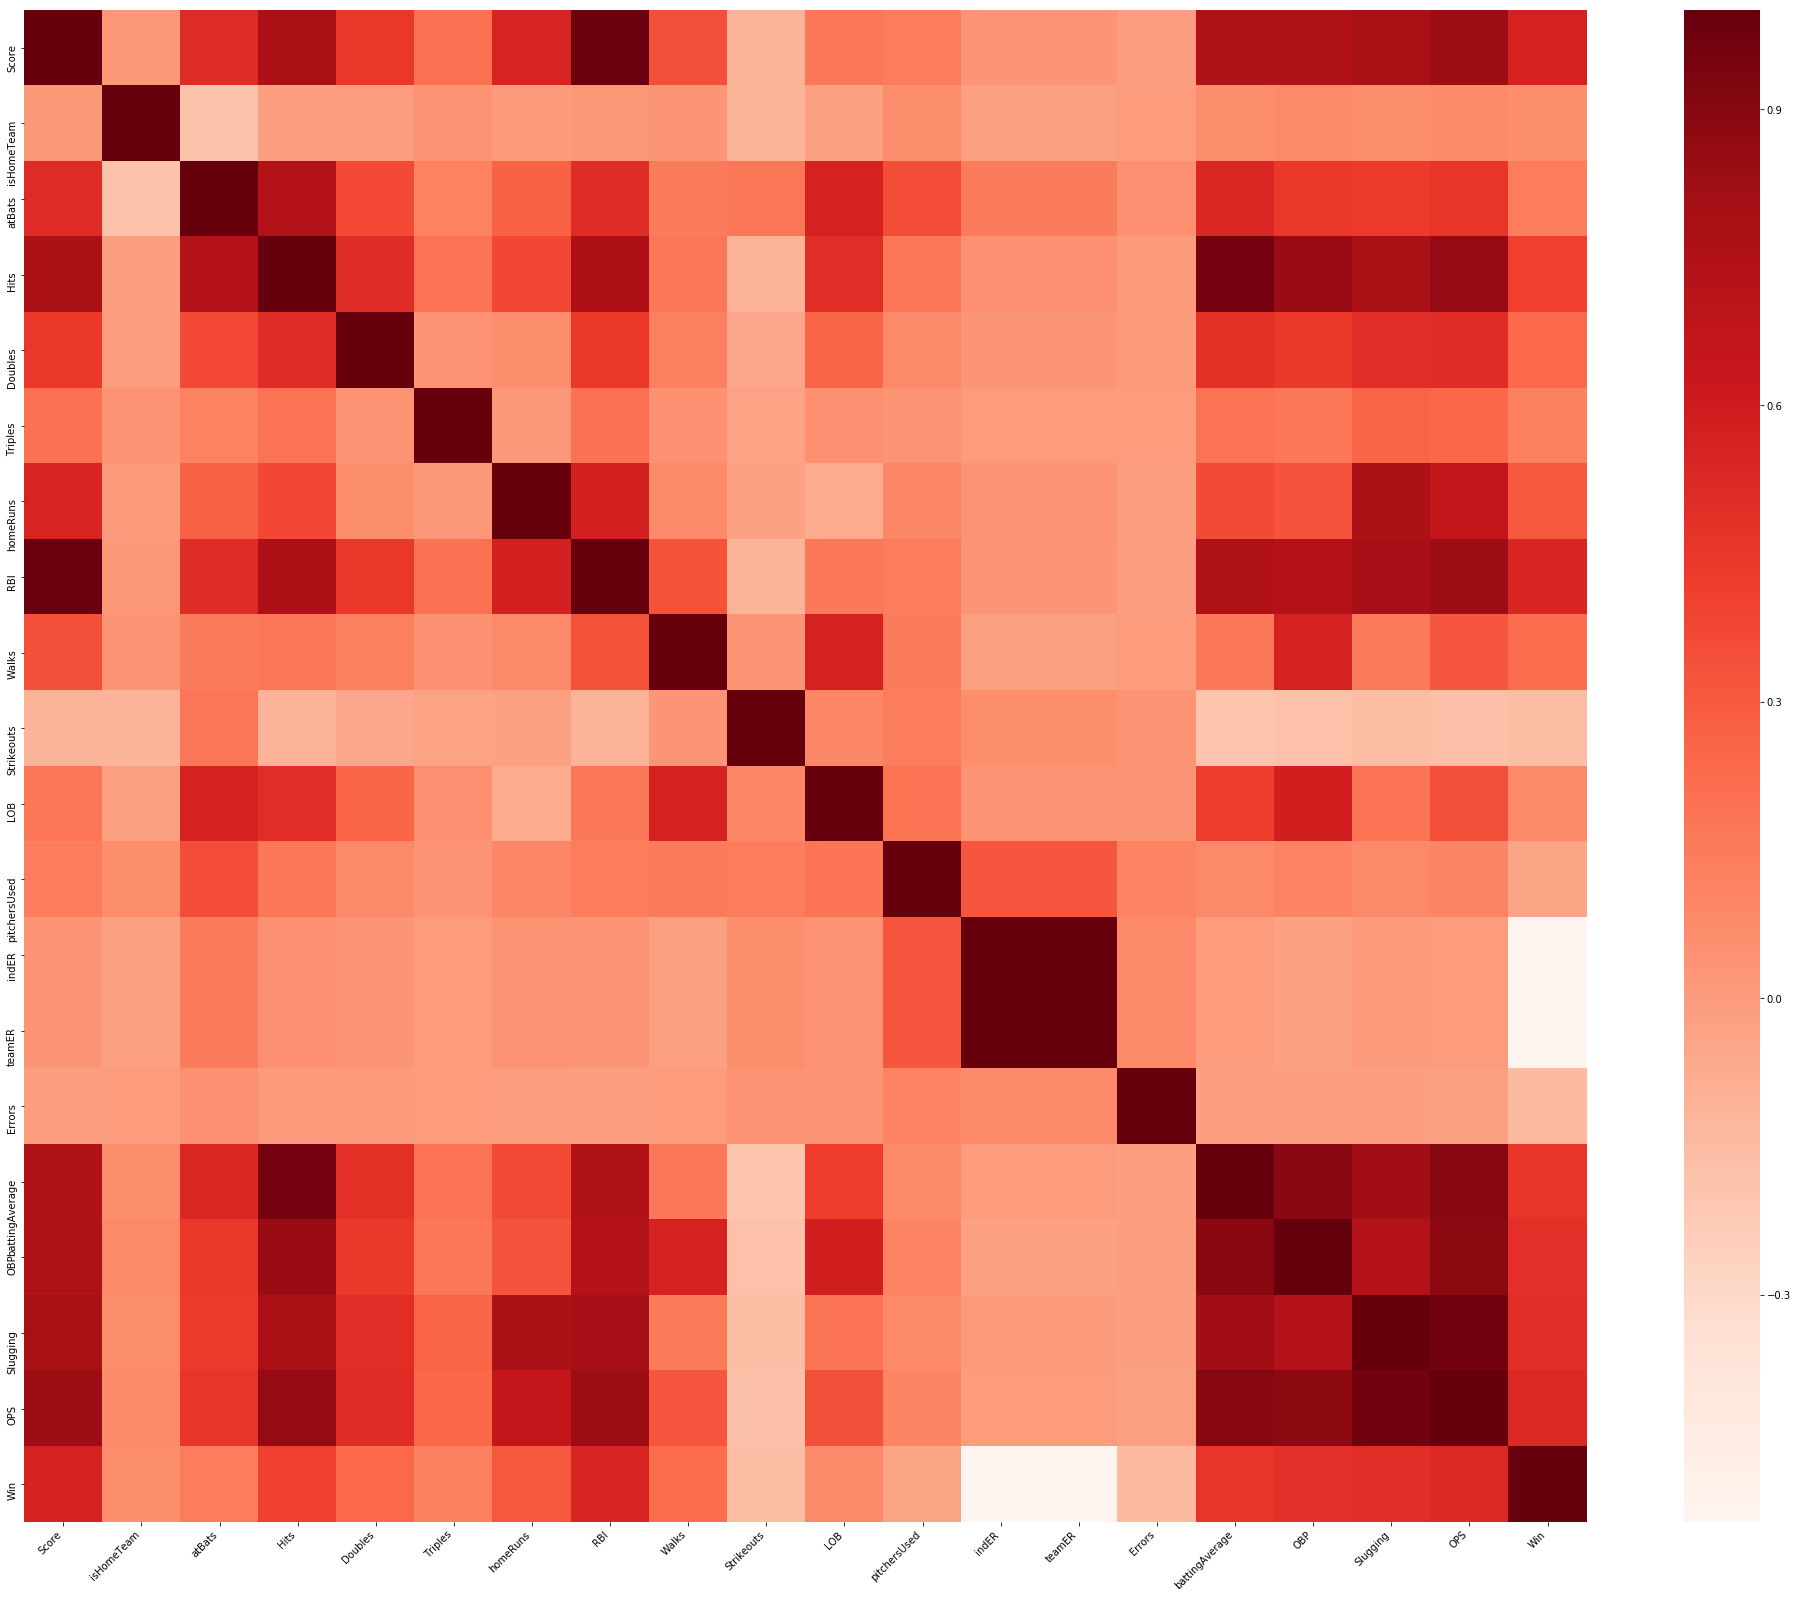

In [221]:
data = pd.read_csv('combinedData.csv')

data.drop(['teamAbbr','League', 'Unnamed: 0'], axis=1, inplace=True)

plt.subplots(figsize=(35,35))
cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.gcf().subplots_adjust(top=.95,bottom=0.35)
plt.xticks(rotation=45,ha='right')
fig = plt.gcf()
plt.show()

Compared to the other correlation matrix, this is much better! As you can see there are a lot more variables that are correlated with a win such as OBP, OPS, and Score. Let's see how it does in the machine learning aspect:

In [222]:
logmodel = LogisticRegression()
print(data.isna().any())
X_train, X_test, y_train, y_test = train_test_split(data.drop('Win', axis=1),
                                                        data['Win'], test_size=0.20,
                                                        random_state=101)

Score             False
isHomeTeam        False
atBats            False
Hits              False
Doubles           False
Triples           False
homeRuns          False
RBI               False
Walks             False
Strikeouts        False
LOB               False
pitchersUsed      False
indER             False
teamER            False
Errors            False
battingAverage    False
OBP               False
Slugging          False
OPS               False
Win               False
dtype: bool


In [223]:
logmodel.fit(X_train, y_train)


logistic_reg_score_train = logmodel.score(X_train, y_train)
print("Percentage correct on training set = ", 100. * logistic_reg_score_train, "%")

c:\users\mike delevan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Percentage correct on training set =  98.77423737186612 %


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4013
           1       0.98      0.99      0.99      4085

   micro avg       0.99      0.99      0.99      8098
   macro avg       0.99      0.99      0.99      8098
weighted avg       0.99      0.99      0.99      8098

[[3937   76]
 [  34 4051]]


[Text(0, 0.5, 'Loss'), Text(0, 1.5, 'Win')]

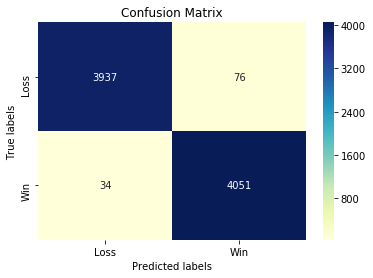

In [224]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

#plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.heatmap(pd.DataFrame(conf_matrix),annot=True, cmap="YlGnBu", fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Loss', 'Win'])
ax.yaxis.set_ticklabels(['Loss', 'Win'])

I see this as an absolute win. Now that we used pre-processed data, our accuracy jumped up from 48% to 99%. Although this may not be a good thing and the system may just be predicting based on past rows that it saw, basically cheating. I'm not sure how to exactly interpet this result as this is a new breakthrough. I will be discussing my finding with Dr. Rudniy and Dr. Graham later in the week.

While we are here let's also get the feature importance ranking to see which features are chosen to be the most important:

In [225]:
forest = ExtraTreesClassifier(n_estimators=500)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature Ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature Ranking:
1. teamER (0.219953)
2. indER (0.209605)
3. Score (0.138852)
4. RBI (0.123964)
5. OPS (0.052283)
6. OBP (0.045783)
7. Slugging (0.045560)
8. battingAverage (0.037557)
9. Hits (0.020970)
10. Errors (0.018790)
11. atBats (0.015568)
12. homeRuns (0.014454)
13. Walks (0.010471)
14. pitchersUsed (0.009610)
15. LOB (0.008845)
16. Strikeouts (0.008676)
17. Doubles (0.008512)
18. isHomeTeam (0.006735)
19. Triples (0.003813)


This differs slightly from the correlation matrix, which will be taken into consideration with later versions of the project.

Now, let's jump over to Lunacy so I can show you a small part of the webapp and then over to pycharm to show you the whole webapp